In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
# 首先导入模型
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)
# 训练三个步骤：
# 实例化模型
clf = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
# 训练集带入实例化后的模型进行训练
clf.fit(Xtrain, ytrain)
rfc.fit(Xtrain, ytrain)
# 使用其他接口将测试集导入训练好的模型，去获取我们希望的结果
## score 为模型的精确度
score_c = clf.score(Xtest, ytest)
score_r = rfc.score(Xtest, ytest)

print("Single Tree: ", score_c)
print("Random Forest: ", score_r)

Single Tree:  0.7777777777777778
Random Forest:  1.0


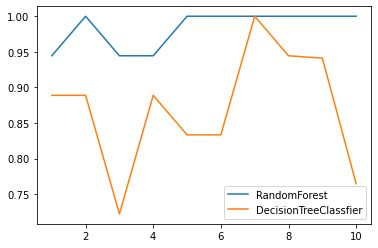

In [4]:
# 交叉验证：cross_val_score
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

rfc = RandomForestClassifier(random_state=0)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label="RandomForest")
plt.plot(range(1,11), clf_s, label="DecisionTreeClassfier")
plt.legend()
plt.show()

In [ ]:
# 观察随机森林中不同决策树的结果
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)

In [25]:
print("在拥有", superpa.index(max(superpa)), "棵决策树的时候预测准确率最高，预测准确率为", max(superpa))

在拥有 33 棵决策树的时候预测准确率最高，预测准确率为 0.9888888888888889


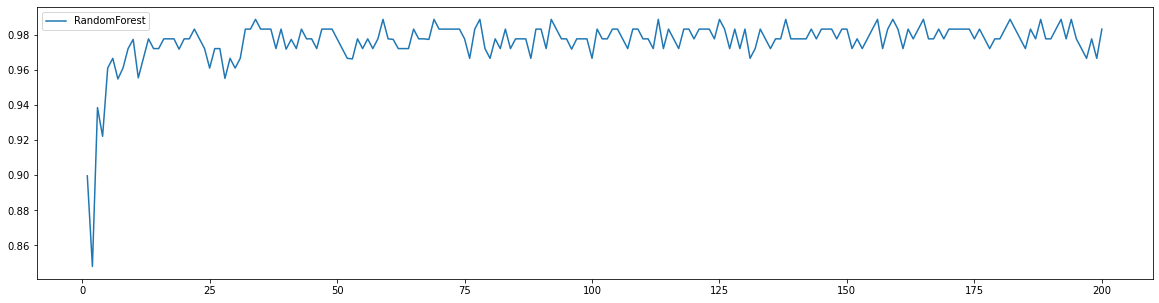

In [8]:
plt.figure(figsize=[20,5])
plt.plot(range(1, 201), superpa, label="RandomForest")
plt.legend()
plt.show()

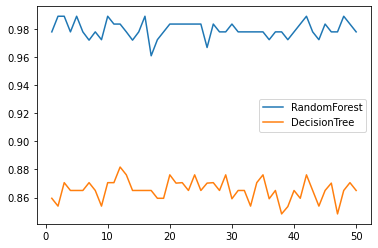

In [11]:
# 观察决策树和随机森林的结果
rfc_l = []
clf_l = []
for i in range(50):
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    rfc = RandomForestClassifier(n_jobs=4)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
plt.plot(range(1,51), rfc_l, label="RandomForest")
plt.plot(range(1,51), clf_l, label="DecisionTree")
plt.legend()
plt.show()